In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import polars as pl
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# importing scaled lagged data
df_lagged_added_stats_sa199m2e = pd.read_csv('sa199m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m2e = pd.read_csv('sa196m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m1e = pd.read_csv('sa196m1e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa198m2e = pd.read_csv('sa198m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m3e = pd.read_csv('sa196m3e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa199m3e = pd.read_csv('sa199m3e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa199m1e = pd.read_csv('sa199m1e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m1 = pd.read_csv('sa78m1_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m3 = pd.read_csv('sa78m3_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m5 = pd.read_csv('sa78m5_new_newest_lagged_added_stats.csv')

In [3]:
grouped_lagged_added_stats = pd.concat([df_lagged_added_stats_sa199m2e,df_lagged_added_stats_sa196m2e,
df_lagged_added_stats_sa196m1e,df_lagged_added_stats_sa198m2e,df_lagged_added_stats_sa196m3e,df_lagged_added_stats_sa199m3e,
df_lagged_added_stats_sa199m1e,df_lagged_added_stats_sa78m1,df_lagged_added_stats_sa78m3,df_lagged_added_stats_sa78m5]).iloc[:,1:]

In [53]:
grouped_lagged_added_stats = grouped_lagged_added_stats.reset_index(drop=True)

In [54]:
sum((grouped_lagged_added_stats['lagged_1_choice_ago']==2) & (grouped_lagged_added_stats['Choice Output']==3))

41

In [62]:
new_group = grouped_lagged_added_stats.iloc[:,:][grouped_lagged_added_stats['Choice Output']>1]
new_group = new_group.iloc[:,:][(new_group['lagged_1_choice_ago']==3) | (new_group['lagged_1_choice_ago']==4)]
new_group = new_group.reset_index(drop=True)

In [63]:
'''
function to chance nomenclature of choice output (2, 3, 4, or 5) to (0 - decrease, 1 - maintained, or 2 - improved)
'''
def set_new_class(df_lagged_scaled):
    df_new_class = df_lagged_scaled.copy()
    new_class=[];
    
    for ind in range(0, len(df_lagged_scaled)):
        c = (df_lagged_scaled['Choice Output'][ind]-df_lagged_scaled['lagged_1_choice_ago'][ind])
        if (c > 0):
            new_class.append(2)
        elif (c == 0):
            new_class.append(1)
        elif (c < 0):
            new_class.append(0)
    df_new_class['New Class'] = new_class;
    return df_new_class;

In [64]:
new_class_group = set_new_class(new_group)

In [77]:
new_class_group['New Class'] = new_class_group['New Class'].astype(str)

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Choice Output', ylabel='Count'>

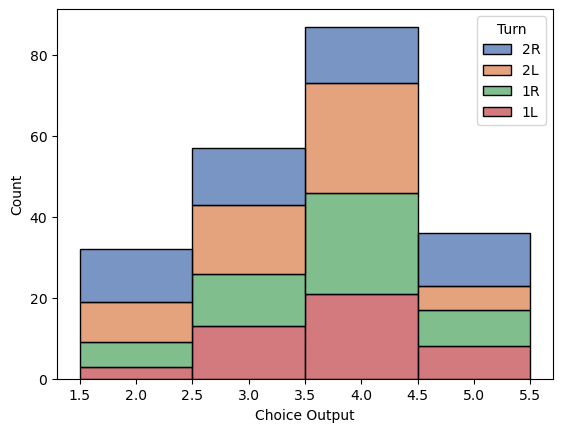

In [601]:
sns.histplot(data = new_class_group.sort_values(by = 'Choice Output'), x = 'Choice Output', hue = 'Turn', multiple = 'stack', discrete = True, palette = 'deep')

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='New Class', ylabel='Count'>

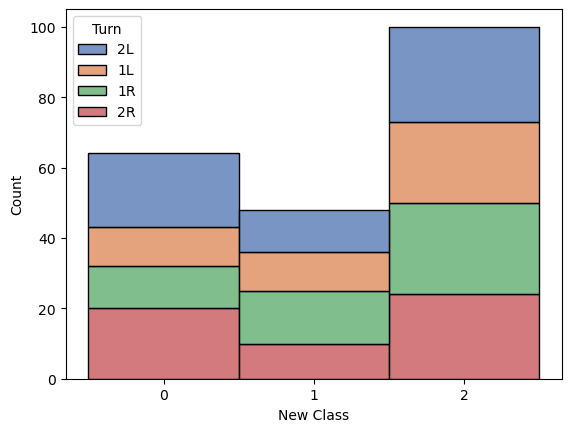

In [142]:
sns.histplot(data = new_class_group.sort_values(by = 'New Class'), x = 'New Class', hue = 'Turn', multiple = 'stack', discrete = True, palette = 'deep')

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Turn', ylabel='Count'>

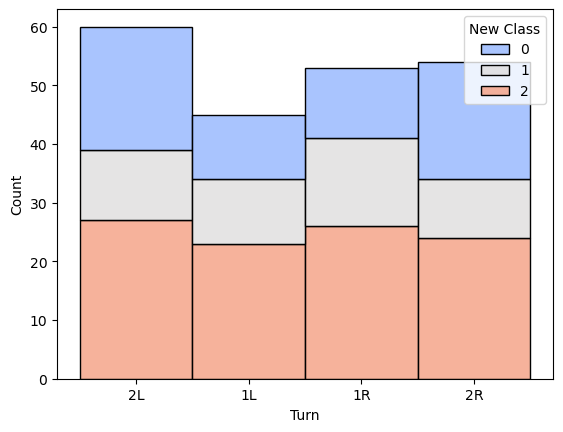

In [79]:
sns.histplot(data = new_class_group.sort_values(by = 'New Class'), x = 'Turn', hue = 'New Class', multiple = 'stack', palette = 'coolwarm')

In [243]:
new_class_group

,Middle Duration,lagged_1_mid_duration,lagged_2_mid_duration,lagged_3_mid_duration,lagged_4_mid_duration,Middle Nose Movement,lagged_1_mid_nose_mov,lagged_2_mid_nose_mov,lagged_3_mid_nose_mov,lagged_4_mid_nose_mov,...,mean_2_past_exitmidentry_duration,mean_3_past_exitmidentry_duration,mean_4_past_exitmidentry_duration,mean_5_past_exitmidentry_duration,Choice Output,lagged_1_choice_ago,lagged_2_choice_ago,lagged_3_choice_ago,lagged_4_choice_ago,New Class
0,0.395349,0.279070,0.441860,0.000000,0.000000,0.499066,0.443050,0.375489,0.000000,0.000000,...,0.472222,0.518519,0.496528,0.397222,3,4,3,2,1,0
1,0.302326,0.395349,0.279070,0.441860,0.000000,0.291543,0.499066,0.443050,0.375489,0.000000,...,0.458333,0.462963,0.500000,0.486111,3,3,4,3,2,1
2,0.279070,0.302326,0.395349,0.279070,0.441860,0.239721,0.291543,0.499066,0.443050,0.375489,...,0.472222,0.472222,0.472222,0.500000,4,3,3,4,3,2
3,0.139535,0.279070,0.302326,0.395349,0.279070,0.226293,0.239721,0.291543,0.499066,0.443050,...,0.465278,0.458333,0.461806,0.463889,3,4,3,3,4,0
4,0.139535,0.139535,0.279070,0.302326,0.395349,0.212414,0.226293,0.239721,0.291543,0.499066,...,0.541667,0.527778,0.506944,0.500000,3,3,4,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.023585,0.891509,0.103774,0.528302,0.066038,0.074648,1.000000,0.161598,0.648750,0.096689,...,0.487138,0.379421,0.432476,0.369132,5,4,4,3,3,2
208,0.070755,0.028302,0.023585,0.891509,0.103774,0.135402,0.059617,0.074648,1.000000,0.161598,...,0.112540,0.108253,0.299839,0.272669,4,4,5,4,4,1
209,0.009434,0.070755,0.028302,0.023585,0.891509,0.029302,0.135402,0.059617,0.074648,1.000000,...,0.114148,0.108253,0.106109,0.259807,5,4,4,5,4,2
210,0.150943,0.004717,0.009434,0.070755,0.028302,0.224511,0.016390,0.029302,0.135402,0.059617,...,0.217042,0.177921,0.165595,0.151768,4,4,5,4,4,1


C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='New Class', ylabel='Middle Tortuosity'>

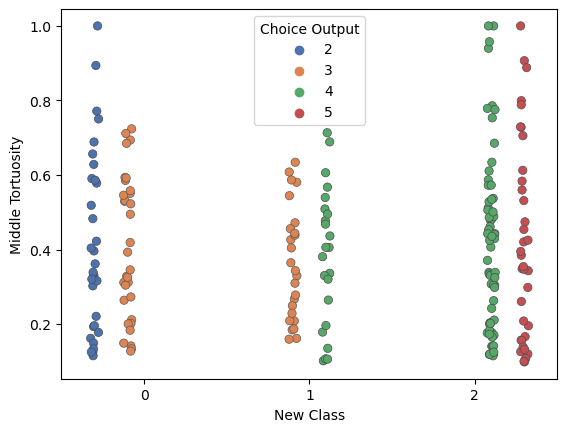

In [254]:
sns.stripplot(data = new_class_group, x = 'New Class', y = 'Middle Tortuosity', hue = 'Choice Output', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

<Axes: xlabel='Middle Duration', ylabel='Middle Tortuosity'>

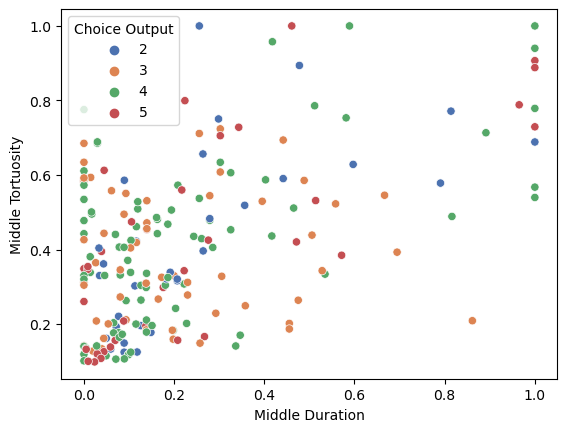

In [255]:
sns.scatterplot(data = new_class_group, x = 'Middle Duration', y = 'Middle Tortuosity', hue = 'Choice Output', palette = 'deep')

<Axes: xlabel='Middle Nose Movement', ylabel='Middle Tortuosity'>

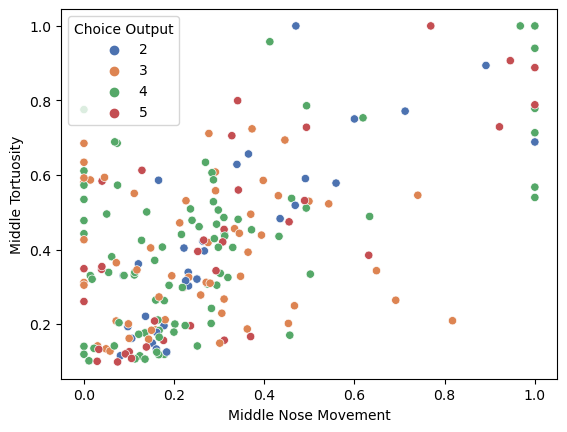

In [256]:
sns.scatterplot(data = new_class_group, x = 'Middle Nose Movement', y = 'Middle Tortuosity', hue = 'Choice Output', palette = 'deep')

<Axes: xlabel='Middle Nose Velocity', ylabel='Middle Tortuosity'>

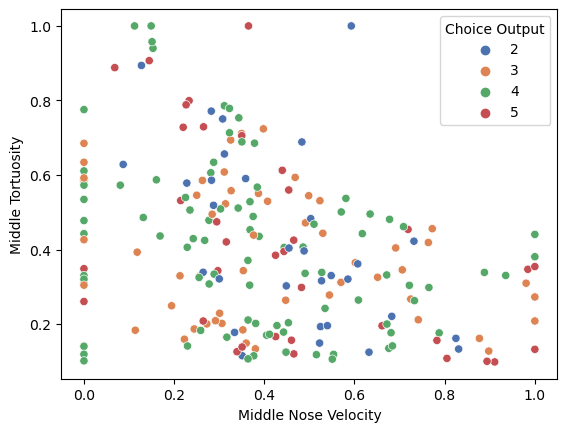

In [257]:
sns.scatterplot(data = new_class_group, x = 'Middle Nose Velocity', y = 'Middle Tortuosity', hue = 'Choice Output', palette = 'deep')

<Axes: xlabel='Middle Nose Movement', ylabel='Middle Nose Velocity'>

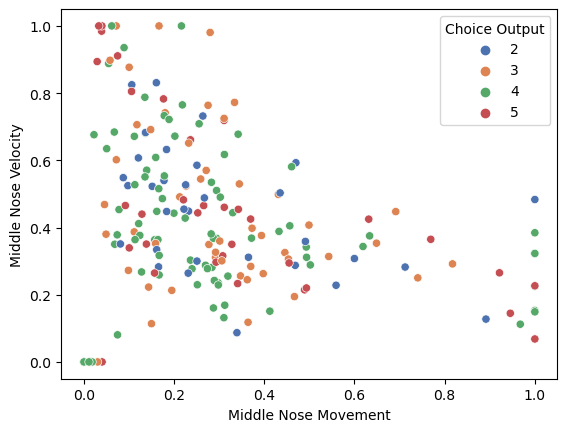

In [258]:
sns.scatterplot(data = new_class_group, x = 'Middle Nose Movement', y = 'Middle Nose Velocity', hue = 'Choice Output', palette = 'deep')

<Axes: xlabel='ExitMidEntry Duration', ylabel='New Current Coeff Time Proportional'>

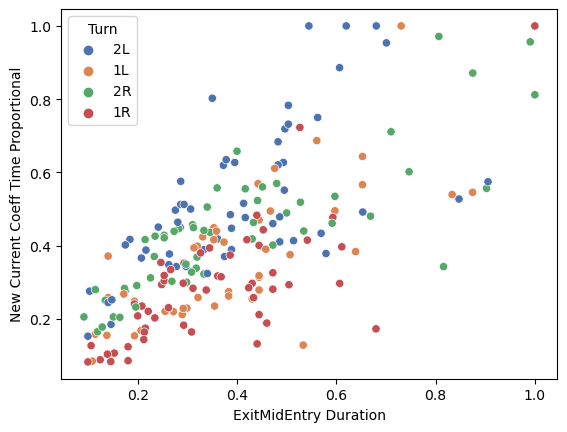

In [265]:
sns.scatterplot(data = new_class_group, x ='ExitMidEntry Duration', y = 'New Current Coeff Time Proportional', hue = 'Turn', palette = 'deep')

<Axes: xlabel='ExitMid Duration', ylabel='Current Coeff Time Proportional'>

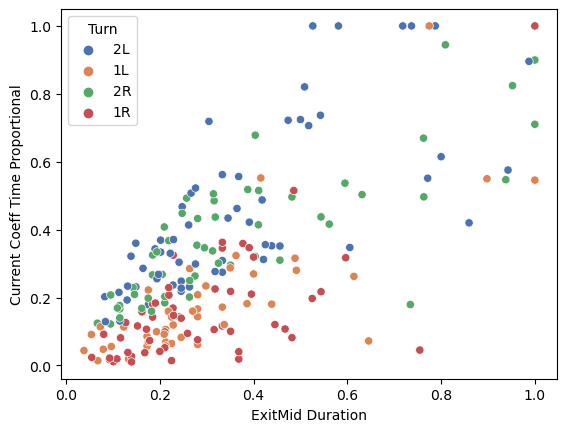

In [266]:
sns.scatterplot(data = new_class_group, x ='ExitMid Duration', y = 'Current Coeff Time Proportional', hue = 'Turn', palette = 'deep')

<Axes: xlabel='lagged_1_entry_tortuosity', ylabel='lagged_1_nose_max_distance'>

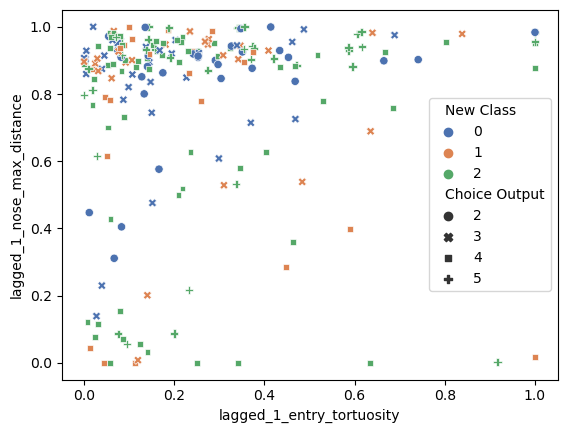

In [275]:
sns.scatterplot(data = new_class_group, x ='lagged_1_entry_tortuosity', y = 'lagged_1_nose_max_distance', hue = 'New Class', style = 'Choice Output', palette = 'deep')

<Axes: xlabel='lagged_1_nose_time_to_max_dist', ylabel='lagged_1_nose_max_distance'>

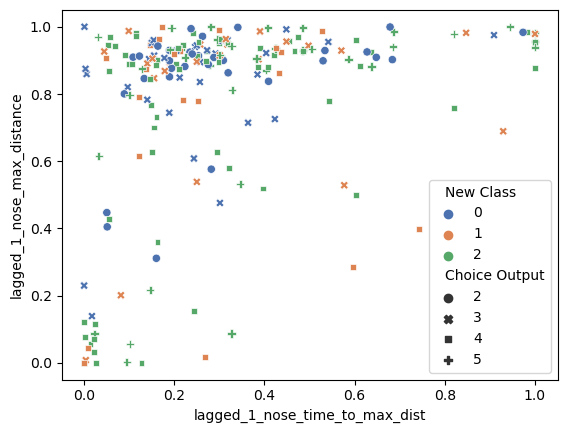

In [277]:
sns.scatterplot(data = new_class_group, x ='lagged_1_nose_time_to_max_dist', y = 'lagged_1_nose_max_distance', hue = 'New Class', style = 'Choice Output', palette = 'deep')

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='New Lagged 2 Cur Coeff Time Proportional', ylabel='New Class'>

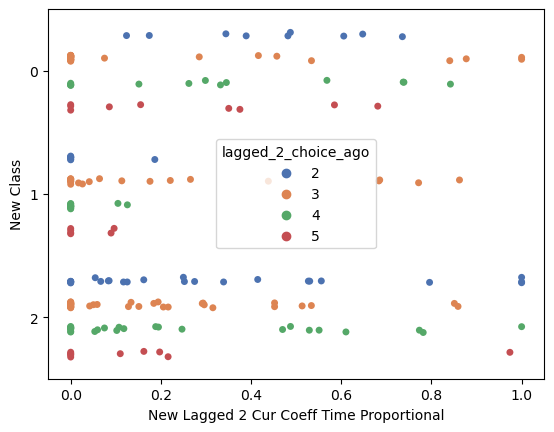

In [305]:
sns.stripplot(data = new_class_group, x ='New Lagged 2 Cur Coeff Time Proportional', y = 'New Class', hue = 'lagged_2_choice_ago', dodge = True, palette = 'deep')

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lagged_2_mid_tail_vel', ylabel='New Class'>

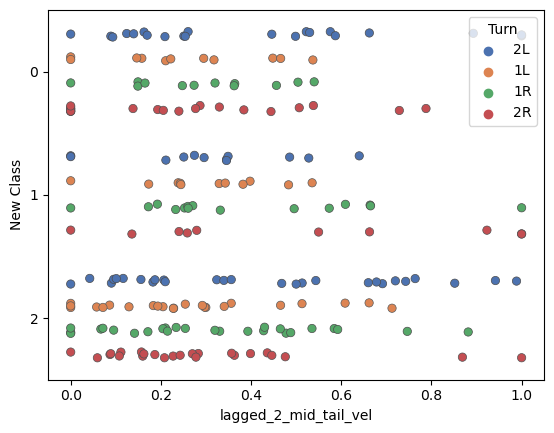

In [234]:
sns.stripplot(data = new_class_group.sort_values(by = 'New Class'), x = 'lagged_2_mid_tail_vel', y = 'New Class', hue = 'Turn', palette = 'deep', dodge=True, s=12, marker=".", linewidth=0.5, alpha=1)

In [155]:
x_main = new_class_group.iloc[:,:].drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',      
       
       'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff',
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
      
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',

       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',

        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',                                                                                                
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity', 
        'Other Tortuosity', 'New Class'])

In [220]:
x_main.columns[:100]

Index(['Middle Duration', 'lagged_1_mid_duration', 'lagged_2_mid_duration',
       'lagged_3_mid_duration', 'lagged_4_mid_duration',
       'Middle Nose Movement', 'lagged_1_mid_nose_mov',
       'lagged_2_mid_nose_mov', 'lagged_3_mid_nose_mov',
       'lagged_4_mid_nose_mov', 'Middle Nose Velocity',
       'lagged_1_mid_nose_vel', 'lagged_2_mid_nose_vel',
       'lagged_3_mid_nose_vel', 'lagged_4_mid_nose_vel',
       'Middle Tail Movement', 'lagged_1_mid_tail_mov',
       'lagged_2_mid_tail_mov', 'lagged_3_mid_tail_mov',
       'lagged_4_mid_tail_mov', 'Middle Tail Velocity',
       'lagged_1_mid_tail_vel', 'lagged_2_mid_tail_vel',
       'lagged_3_mid_tail_vel', 'lagged_4_mid_tail_vel', 'Middle Tortuosity',
       'lagged_1_mid_tortuosity', 'lagged_2_mid_tortuosity',
       'lagged_3_mid_tortuosity', 'lagged_4_mid_tortuosity', 'Current Coeff',
       'lagged_1_current_coeff', 'lagged_2_current_coeff',
       'lagged_3_current_coeff', 'lagged_4_current_coeff',
       'Lagged 1 Cur Co

In [159]:
x_ = x_main.values

In [160]:
y_ = new_class_group['New Class'].values

In [163]:
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=50)

In [164]:
mod = GradientBoostingClassifier(n_estimators = 100, max_depth=3, learning_rate=0.01)
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

In [165]:
target_names = ['0', '1', '2']

In [166]:
f1_sc = f1_score(y_test, y_pred, average = 'weighted')
f1_sc

0.6277190509748649

In [167]:
p_sc = precision_score(y_test, y_pred, average = 'weighted')
p_sc

0.6493738819320215

In [168]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[11,  1,  3],
       [ 2,  1,  6],
       [ 2,  0, 17]], dtype=int64)

In [169]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.50      0.11      0.18         9
           2       0.65      0.89      0.76        19

    accuracy                           0.67        43
   macro avg       0.63      0.58      0.56        43
weighted avg       0.65      0.67      0.63        43



In [172]:
from sklearn.inspection import permutation_importance

In [173]:
def plot_permutation_importance(clf, X, y, col, ax):
    result = permutation_importance(clf, X, y, n_repeats=30, random_state=0, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    # `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
    # renamed to `tick_labels`. The following code handles this, but as a
    # scikit-learn user you probably can write simpler code by using `labels=...`
    # (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
    tick_labels_parameter_name = (
        "tick_labels"
        #if parse_version(matplotlib.__version__) >= parse_version("3.9")
        #else "labels"
    )
    tick_labels_dict = {tick_labels_parameter_name: col.columns[perm_sorted_idx]}
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False)
    ax.set_yticklabels(col.columns[perm_sorted_idx])
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

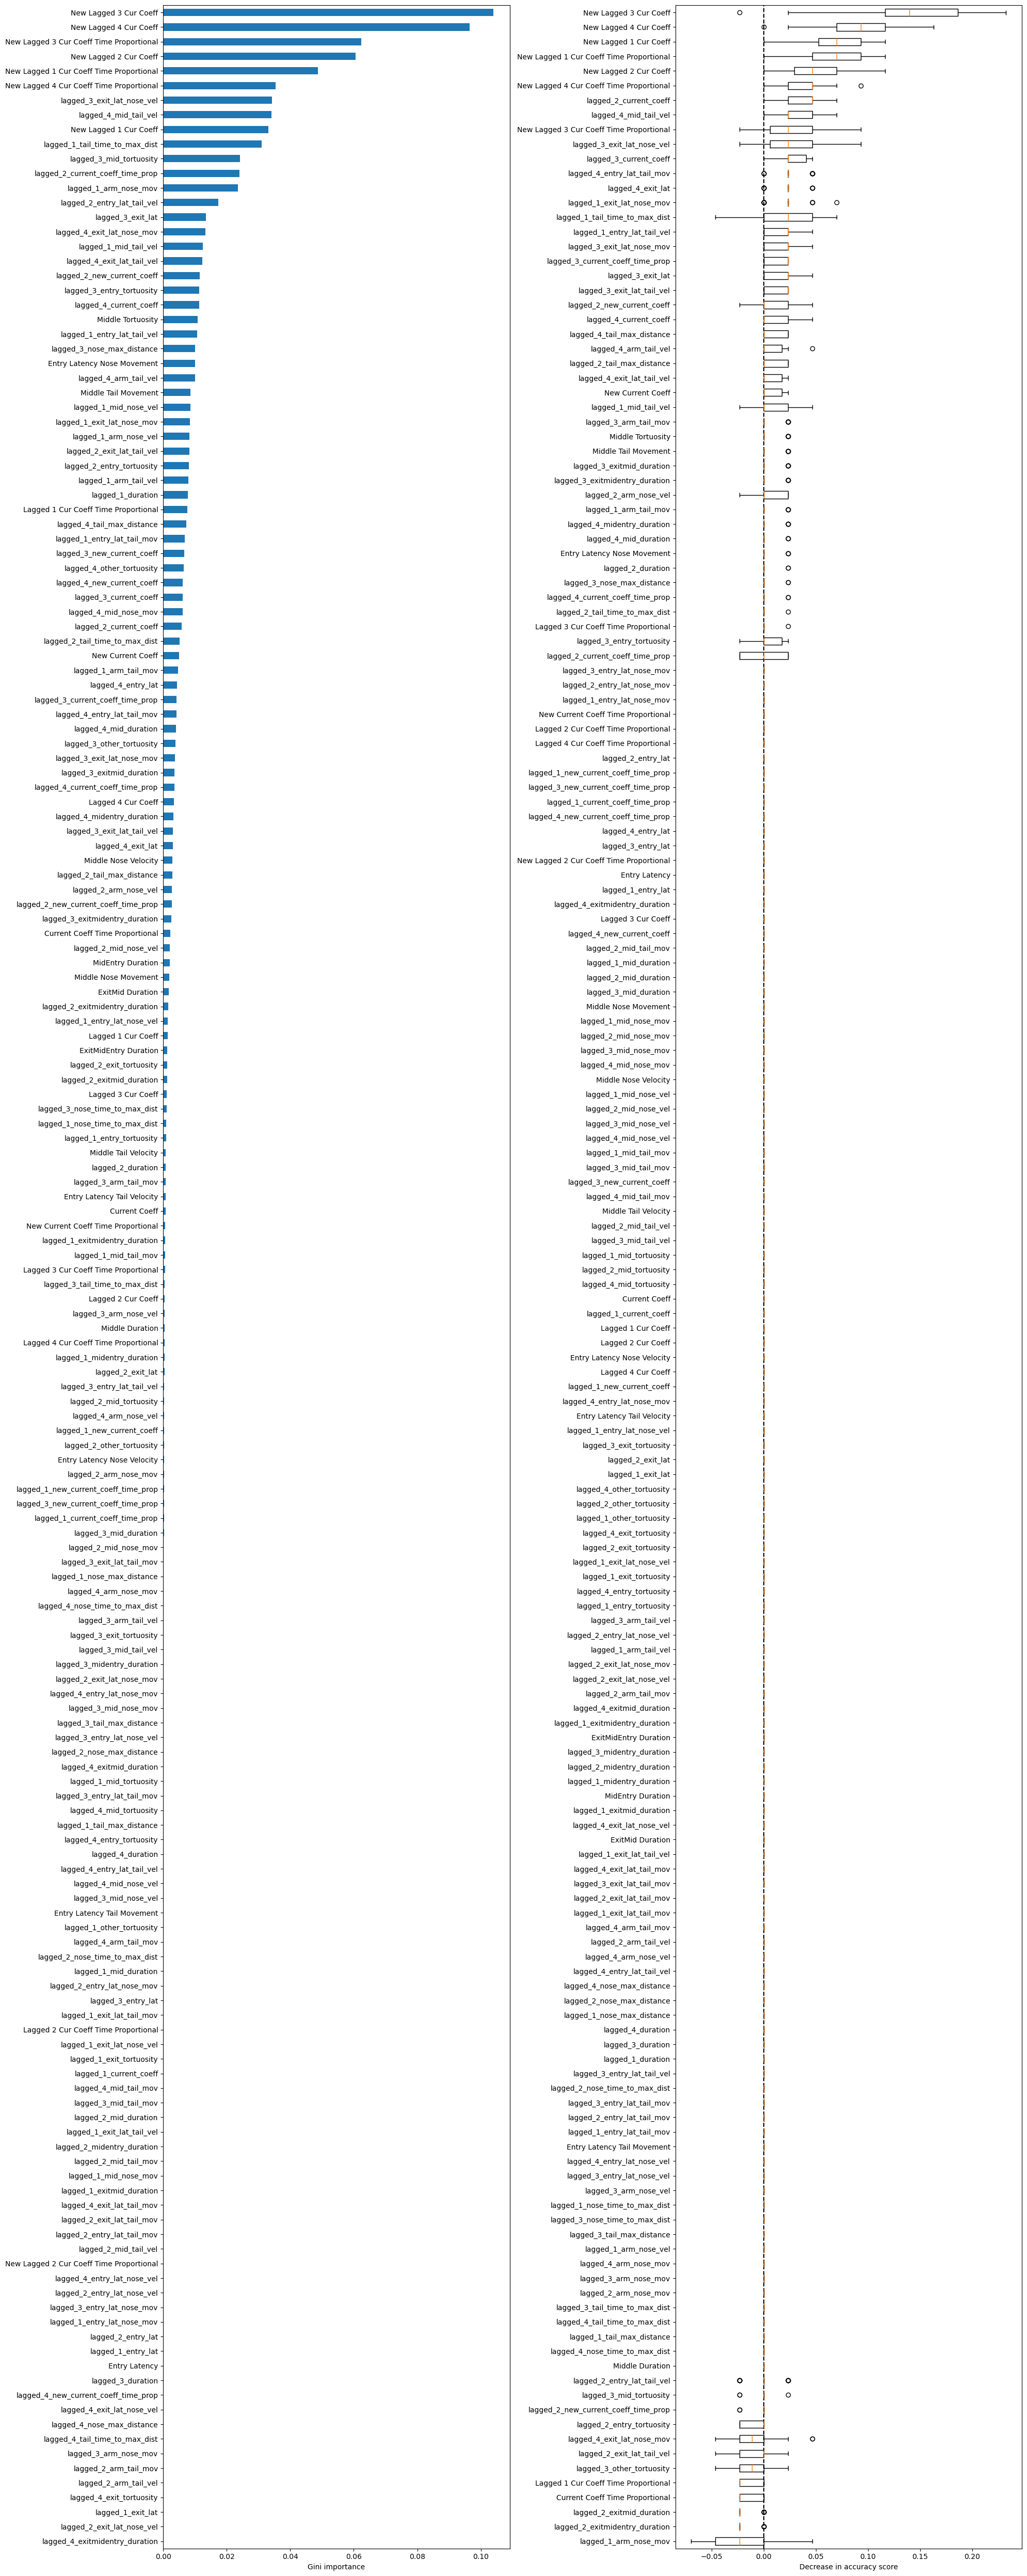

In [174]:
mdi_importances1 = pd.Series(mod.feature_importances_, index=x_main.columns)
tree_importance_sorted_idx1 = np.argsort(mod.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
mdi_importances1.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(mod, X_test, y_test, x_main,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')

In [306]:
x_main1 = new_class_group.iloc[:,:].drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',
        'Current Coeff',
       'lagged_1_current_coeff', 'lagged_2_current_coeff',
       'lagged_3_current_coeff', 'lagged_4_current_coeff',
       'Lagged 1 Cur Coeff', 'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff', 'Lagged 2 Cur Coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'Lagged 3 Cur Coeff', 'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff', 'Lagged 4 Cur Coeff',
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
        'Current Coeff Time Proportional', 'lagged_1_current_coeff_time_prop',
       'lagged_2_current_coeff_time_prop', 'lagged_3_current_coeff_time_prop',
       'lagged_4_current_coeff_time_prop',
       'Lagged 1 Cur Coeff Time Proportional',
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       'Lagged 2 Cur Coeff Time Proportional',
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       'Lagged 3 Cur Coeff Time Proportional',
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       'Lagged 4 Cur Coeff Time Proportional',
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',
                                                                                                             
                                                                                                             
                                                                                                             'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',
                                                                                                               
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity',
        'New Lagged 4 Cur Coeff', 'New Lagged 4 Cur Coeff Time Proportional', 
        'Other Tortuosity', 'lagged_1_other_tortuosity',
       'lagged_2_other_tortuosity', 'lagged_3_other_tortuosity',
       'lagged_4_other_tortuosity', 'New Class',
        'lagged_4_mid_duration', 'lagged_4_mid_nose_mov', 'lagged_4_mid_nose_vel', 'lagged_4_mid_tail_mov', 'lagged_4_mid_tail_vel',
        'lagged_4_mid_tortuosity', 'lagged_4_new_current_coeff', 'lagged_4_new_current_coeff_time_prop', 
        'lagged_4_entry_lat', 'lagged_4_entry_lat_nose_mov', 'lagged_4_entry_lat_nose_vel', 'lagged_4_entry_lat_tail_mov',  'lagged_4_entry_lat_tail_vel', 
        'lagged_4_exitmid_duration', 'lagged_4_midentry_duration', 'lagged_4_exitmidentry_duration',
        'lagged_2_new_current_coeff', 'lagged_3_new_current_coeff', 'New Lagged 2 Cur Coeff',
       'New Lagged 3 Cur Coeff', 'lagged_2_new_current_coeff_time_prop',
       'lagged_3_new_current_coeff_time_prop', 'New Lagged 2 Cur Coeff Time Proportional',
       'New Lagged 3 Cur Coeff Time Proportional'
                                                   
                                                   ])

In [308]:
x_main1.columns

Index(['Middle Duration', 'lagged_1_mid_duration', 'lagged_2_mid_duration',
       'lagged_3_mid_duration', 'Middle Nose Movement',
       'lagged_1_mid_nose_mov', 'lagged_2_mid_nose_mov',
       'lagged_3_mid_nose_mov', 'Middle Nose Velocity',
       'lagged_1_mid_nose_vel',
       ...
       'lagged_2_exitmid_duration', 'lagged_3_exitmid_duration',
       'MidEntry Duration', 'lagged_1_midentry_duration',
       'lagged_2_midentry_duration', 'lagged_3_midentry_duration',
       'ExitMidEntry Duration', 'lagged_1_exitmidentry_duration',
       'lagged_2_exitmidentry_duration', 'lagged_3_exitmidentry_duration'],
      dtype='object', length=126)

In [309]:
x_1 = x_main1.values

In [310]:
y_1 = new_class_group['New Class'].values

In [311]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_1, y_1, test_size=0.2, random_state=50)

In [343]:
mod1 = GradientBoostingClassifier(n_estimators = 100, max_depth=6, learning_rate=0.01)
mod1.fit(X_train1, y_train1)
y_pred1 = mod1.predict(X_test1)

In [344]:
target_names = ['0', '1', '2']

In [345]:
f1_sc1 = f1_score(y_test1, y_pred1, average = 'weighted')
f1_sc1

0.4050203026947213

In [346]:
p_sc1 = precision_score(y_test1, y_pred1, average = 'weighted')
p_sc1

0.41601073345259393

In [347]:
cf_matrix1 = confusion_matrix(y_test1, y_pred1)
cf_matrix1

array([[ 5,  1,  9],
       [ 1,  2,  6],
       [ 6,  2, 11]], dtype=int64)

In [348]:
print(classification_report(y_test1, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

           0       0.42      0.33      0.37        15
           1       0.40      0.22      0.29         9
           2       0.42      0.58      0.49        19

    accuracy                           0.42        43
   macro avg       0.41      0.38      0.38        43
weighted avg       0.42      0.42      0.41        43



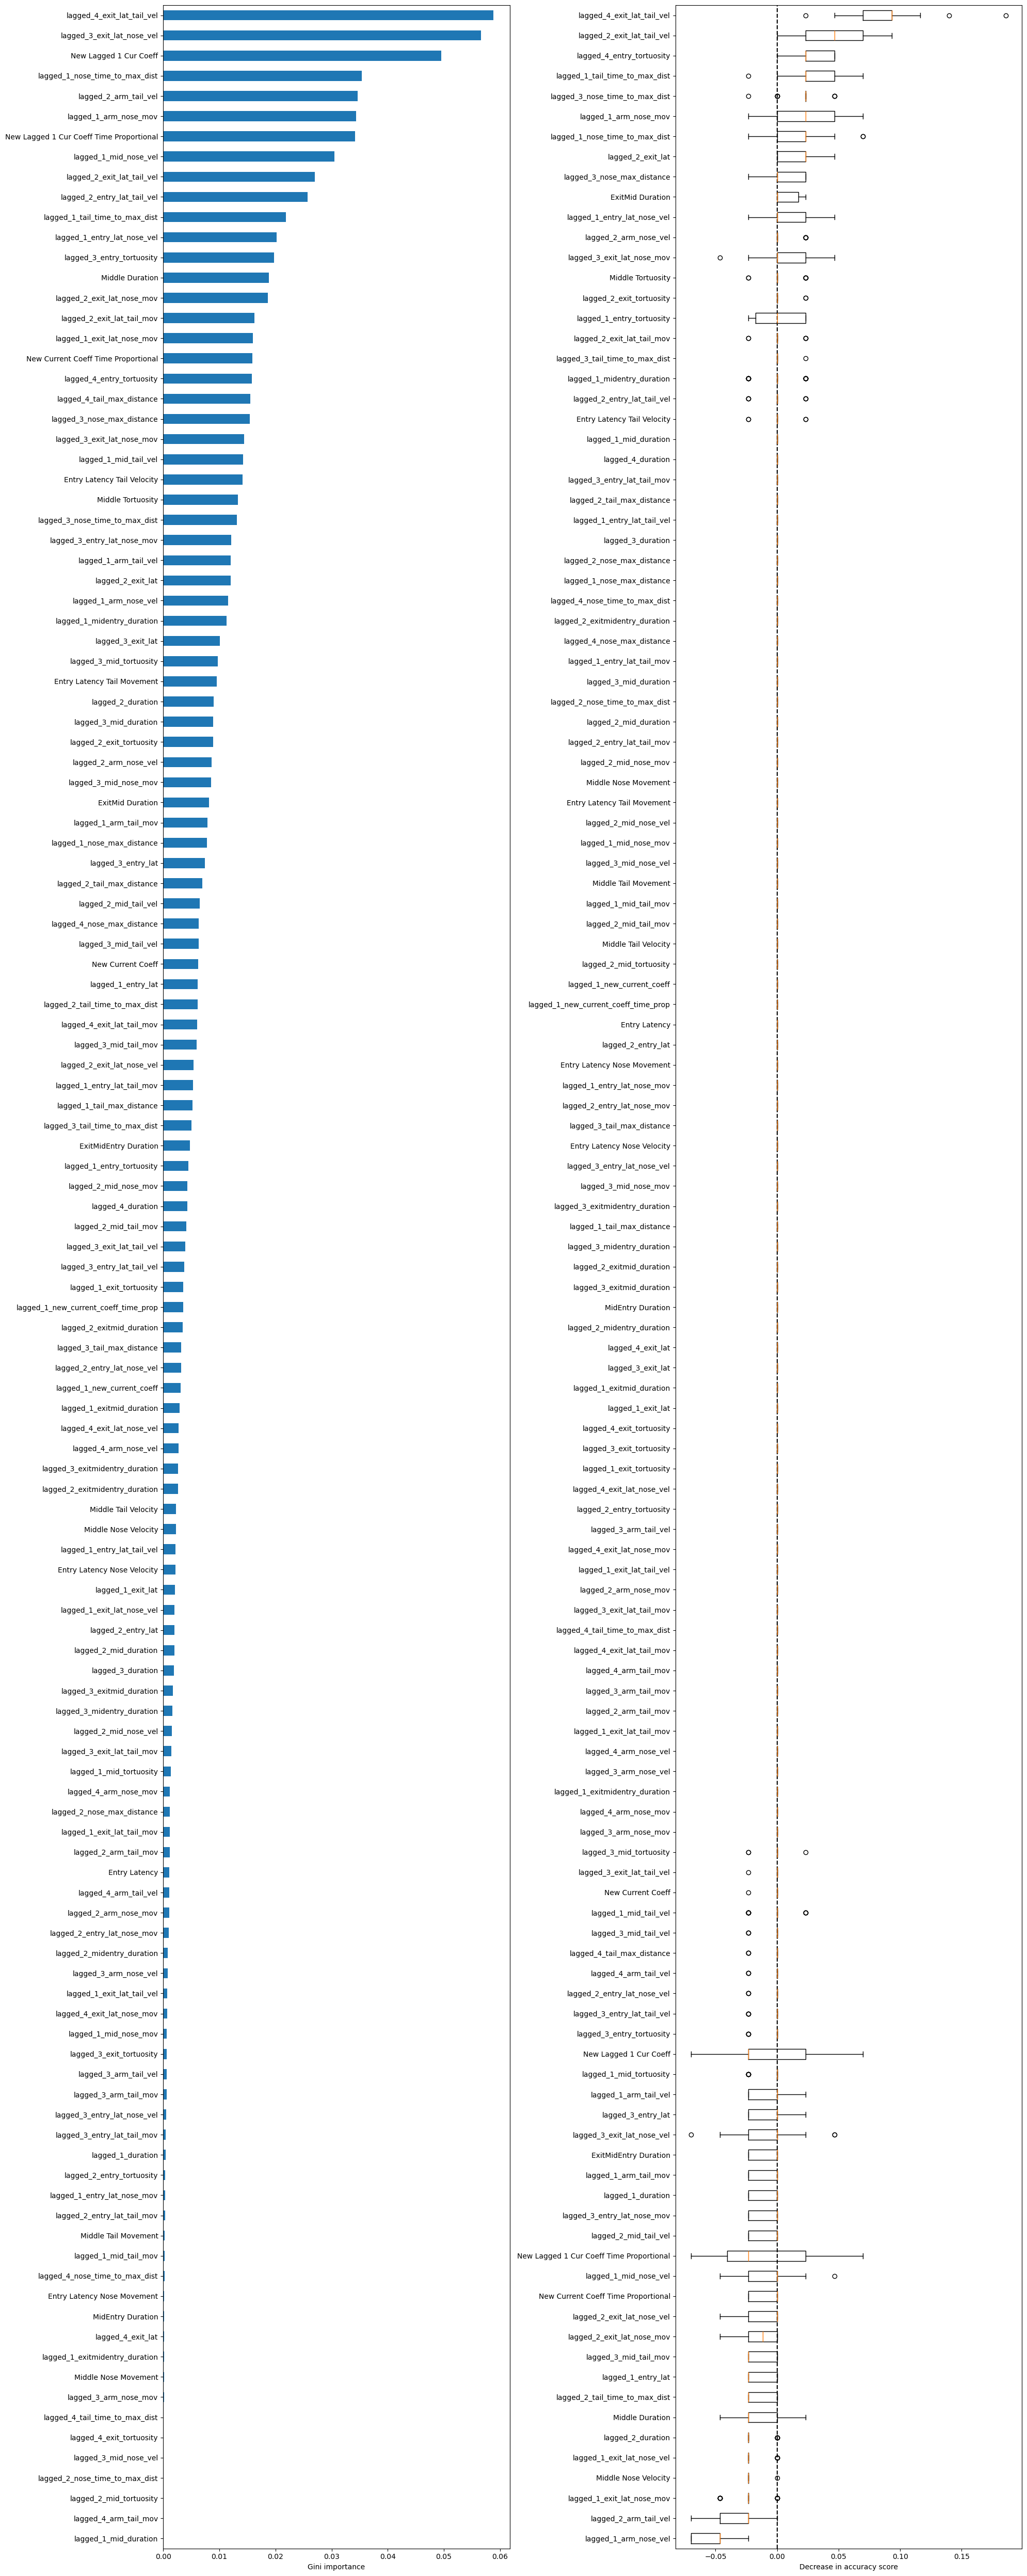

In [349]:
mdi_importances11 = pd.Series(mod1.feature_importances_, index=x_main1.columns)
tree_importance_sorted_idx11 = np.argsort(mod1.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
mdi_importances11.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(mod1, X_test1, y_test1, x_main1,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')

In [353]:
x_main2 = new_class_group.iloc[:,:].drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',
        'Current Coeff',
       'lagged_1_current_coeff', 'lagged_2_current_coeff',
       'lagged_3_current_coeff', 'lagged_4_current_coeff',
       'Lagged 1 Cur Coeff', 'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff', 'Lagged 2 Cur Coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'Lagged 3 Cur Coeff', 'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff', 'Lagged 4 Cur Coeff',
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
        'Current Coeff Time Proportional', 'lagged_1_current_coeff_time_prop',
       'lagged_2_current_coeff_time_prop', 'lagged_3_current_coeff_time_prop',
       'lagged_4_current_coeff_time_prop',
       'Lagged 1 Cur Coeff Time Proportional',
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       'Lagged 2 Cur Coeff Time Proportional',
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       'Lagged 3 Cur Coeff Time Proportional',
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       'Lagged 4 Cur Coeff Time Proportional',
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',
                                                                                                             
                                                                                                             
                                                                                                             'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',
                                                                                                               
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity',
        'New Lagged 4 Cur Coeff', 'New Lagged 4 Cur Coeff Time Proportional', 
        'Other Tortuosity', 'lagged_1_other_tortuosity',
       'lagged_2_other_tortuosity', 'lagged_3_other_tortuosity',
       'lagged_4_other_tortuosity', 'New Class',
        'lagged_4_mid_duration', 'lagged_4_mid_nose_mov', 'lagged_4_mid_nose_vel', 'lagged_4_mid_tail_mov', 'lagged_4_mid_tail_vel',
        'lagged_4_mid_tortuosity', 'lagged_4_new_current_coeff', 'lagged_4_new_current_coeff_time_prop', 
        'lagged_4_entry_lat', 'lagged_4_entry_lat_nose_mov', 'lagged_4_entry_lat_nose_vel', 'lagged_4_entry_lat_tail_mov',  'lagged_4_entry_lat_tail_vel', 
        'lagged_4_exitmid_duration', 'lagged_4_midentry_duration', 'lagged_4_exitmidentry_duration',
        'lagged_2_new_current_coeff', 'lagged_3_new_current_coeff', 'New Lagged 2 Cur Coeff',
       'New Lagged 3 Cur Coeff', 'lagged_2_new_current_coeff_time_prop',
       'lagged_3_new_current_coeff_time_prop', 'New Lagged 2 Cur Coeff Time Proportional',
       'New Lagged 3 Cur Coeff Time Proportional',
        
                                                    
        'lagged_2_mid_duration',
       'lagged_3_mid_duration', 'lagged_2_mid_nose_mov',
       'lagged_3_mid_nose_mov', 'lagged_2_mid_nose_vel',
       'lagged_3_mid_nose_vel', 'lagged_2_mid_tail_mov',
       'lagged_3_mid_tail_mov','lagged_2_mid_tail_vel',
       'lagged_3_mid_tail_vel',
       'lagged_2_mid_tortuosity', 'lagged_3_mid_tortuosity',
         'lagged_2_entry_lat', 'lagged_3_entry_lat',
       
       'lagged_2_entry_lat_nose_mov', 'lagged_3_entry_lat_nose_mov',
       
       'lagged_2_entry_lat_nose_vel', 'lagged_3_entry_lat_nose_vel',
       
       'lagged_2_entry_lat_tail_mov', 'lagged_3_entry_lat_tail_mov',
       
       'lagged_2_entry_lat_tail_vel', 'lagged_3_entry_lat_tail_vel',
        'lagged_3_duration',
       'lagged_4_duration', 'lagged_3_nose_max_distance',
       'lagged_4_nose_max_distance', 'lagged_3_nose_time_to_max_dist',
       'lagged_4_nose_time_to_max_dist', 'lagged_3_tail_max_distance',
       'lagged_4_tail_max_distance', 'lagged_3_tail_time_to_max_dist',
       'lagged_4_tail_time_to_max_dist', 'lagged_3_arm_nose_mov',
       'lagged_4_arm_nose_mov', 'lagged_3_arm_nose_vel',
       'lagged_4_arm_nose_vel', 'lagged_3_arm_tail_mov',
       'lagged_4_arm_tail_mov', 'lagged_3_arm_tail_vel',
       'lagged_4_arm_tail_vel', 'lagged_3_entry_tortuosity',
       'lagged_4_entry_tortuosity', 'lagged_3_exit_tortuosity',
       'lagged_4_exit_tortuosity',
       'lagged_3_exit_lat', 'lagged_4_exit_lat',
        'lagged_3_exit_lat_nose_mov', 'lagged_4_exit_lat_nose_mov',
       
       'lagged_3_exit_lat_nose_vel', 'lagged_4_exit_lat_nose_vel',
       
       'lagged_3_exit_lat_tail_mov', 'lagged_4_exit_lat_tail_mov',
       
       'lagged_3_exit_lat_tail_vel', 'lagged_4_exit_lat_tail_vel',
       
       'lagged_2_exitmid_duration', 'lagged_3_exitmid_duration',
      
       'lagged_2_midentry_duration', 'lagged_3_midentry_duration',
       
       'lagged_2_exitmidentry_duration', 'lagged_3_exitmidentry_duration'                                           
                                                   ])

In [357]:
x_main2.columns

Index(['Middle Duration', 'lagged_1_mid_duration', 'Middle Nose Movement',
       'lagged_1_mid_nose_mov', 'Middle Nose Velocity',
       'lagged_1_mid_nose_vel', 'Middle Tail Movement',
       'lagged_1_mid_tail_mov', 'Middle Tail Velocity',
       'lagged_1_mid_tail_vel', 'Middle Tortuosity', 'lagged_1_mid_tortuosity',
       'New Current Coeff', 'lagged_1_new_current_coeff',
       'New Lagged 1 Cur Coeff', 'New Current Coeff Time Proportional',
       'lagged_1_new_current_coeff_time_prop',
       'New Lagged 1 Cur Coeff Time Proportional', 'Entry Latency',
       'lagged_1_entry_lat', 'Entry Latency Nose Movement',
       'lagged_1_entry_lat_nose_mov', 'Entry Latency Nose Velocity',
       'lagged_1_entry_lat_nose_vel', 'Entry Latency Tail Movement',
       'lagged_1_entry_lat_tail_mov', 'Entry Latency Tail Velocity',
       'lagged_1_entry_lat_tail_vel', 'lagged_1_duration', 'lagged_2_duration',
       'lagged_1_nose_max_distance', 'lagged_2_nose_max_distance',
       'lagged_1_n

In [358]:
x_2 = x_main2.values

In [359]:
y_2 = new_class_group['New Class'].values

In [520]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_2, y_2, test_size=0.2, random_state=15)

In [558]:
params2 = dict(n_estimators = 100, max_depth=8, learning_rate=0.01, random_state = 5)
mod2 = GradientBoostingClassifier(**params2, validation_fraction=0.1, n_iter_no_change=50)
mod2.fit(X_train2, y_train2)
estimators = mod2.n_estimators_
estimators
y_pred2 = mod2.predict(X_test2)

In [559]:
estimators

51

In [560]:
mod2.train_score_

array([1.01721129, 0.99827936, 0.97975389, 0.96173321, 0.94419764,
       0.92712532, 0.91023593, 0.89377933, 0.87773754, 0.86209377,
       0.8468323 , 0.83193836, 0.8173981 , 0.80319847, 0.78932717,
       0.77577259, 0.76252375, 0.74957025, 0.73690225, 0.72470802,
       0.71257925, 0.70070943, 0.68909051, 0.67771483, 0.66657506,
       0.65566422, 0.64497563, 0.63450289, 0.6242399 , 0.61418078,
       0.60431992, 0.59465192, 0.5851716 , 0.575874  , 0.56675432,
       0.55780796, 0.54903048, 0.54041763, 0.53196527, 0.52366946,
       0.51552634, 0.50753224, 0.49968358, 0.49197691, 0.48440889,
       0.4769763 , 0.46967602, 0.46250503, 0.45546039, 0.44853928,
       0.44173895])

In [561]:
target_names = ['0', '1', '2']

In [562]:
f1_sc2 = f1_score(y_test2, y_pred2, average = 'weighted')
f1_sc2

0.3323514211886305

In [563]:
p_sc2 = precision_score(y_test2, y_pred2, average = 'weighted')
p_sc2

0.3434762911507097

In [564]:
cf_matrix2 = confusion_matrix(y_test2, y_pred2)
cf_matrix2

array([[ 4,  0, 10],
       [ 4,  1,  7],
       [ 3,  3, 11]], dtype=int64)

In [528]:
print(classification_report(y_test2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

           0       0.43      0.21      0.29        14
           1       0.38      0.25      0.30        12
           2       0.39      0.65      0.49        17

    accuracy                           0.40        43
   macro avg       0.40      0.37      0.36        43
weighted avg       0.40      0.40      0.37        43



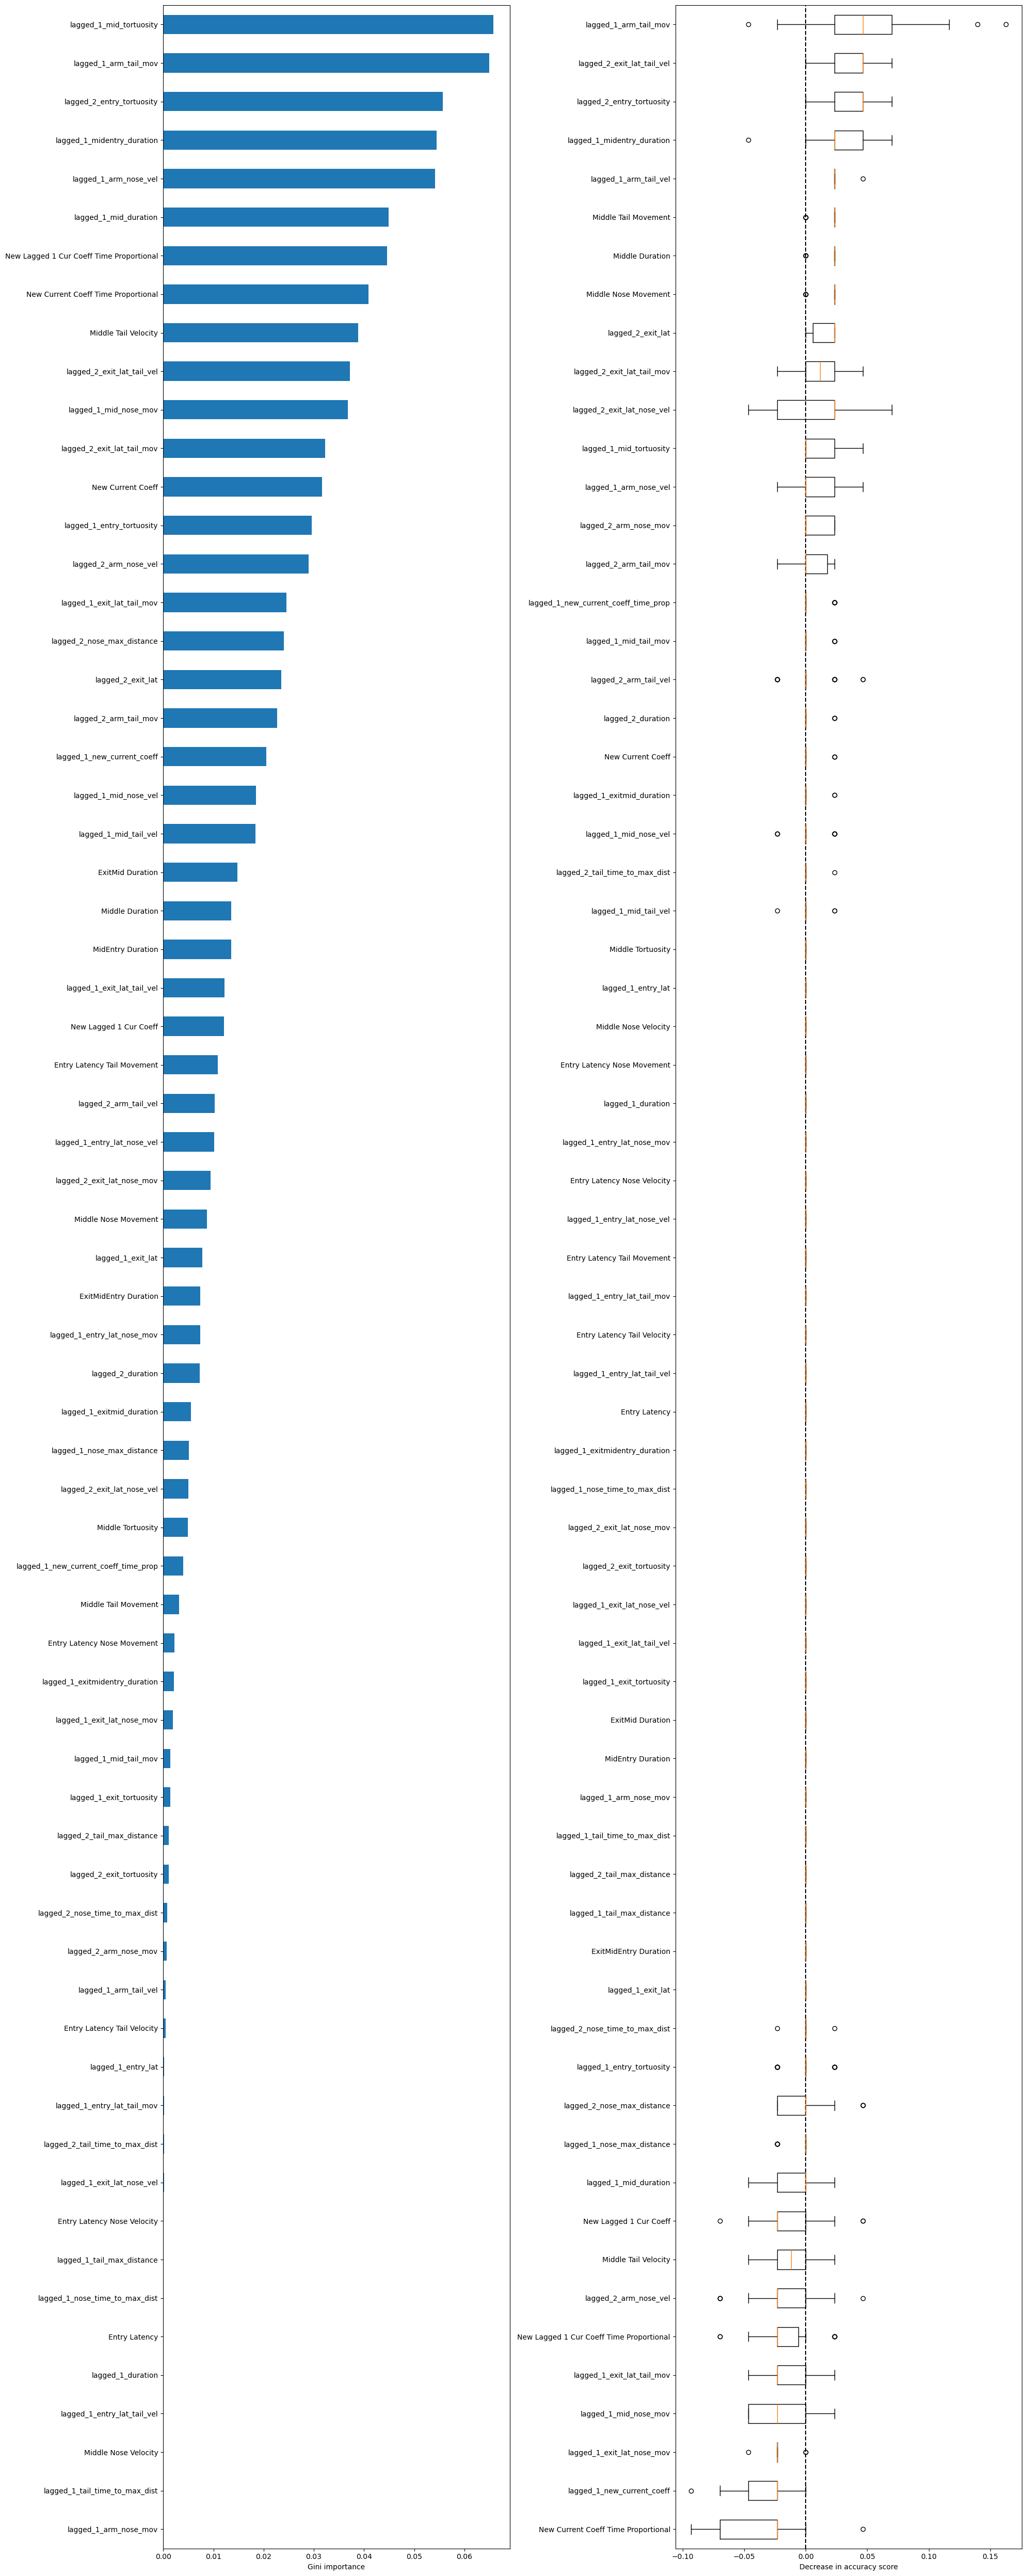

In [529]:
mdi_importances12 = pd.Series(mod2.feature_importances_, index=x_main2.columns)
tree_importance_sorted_idx12 = np.argsort(mod2.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
mdi_importances12.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(mod2, X_test2, y_test2, x_main2,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')

In [565]:
from sklearn.ensemble import RandomForestClassifier

In [588]:
rf = RandomForestClassifier(n_estimators=1000, random_state=0, max_features = None)
rf.fit(X_train2, y_train2)
y_prf2 = rf.predict(X_test2)

In [600]:
rf.feature_importances_

array([0.01012502, 0.01451945, 0.00908647, 0.01913244, 0.00750545,
       0.01806805, 0.01207775, 0.02112448, 0.0100352 , 0.02037182,
       0.00920047, 0.01517209, 0.0210043 , 0.01914714, 0.03233151,
       0.02139023, 0.01390203, 0.0297583 , 0.01287424, 0.01043956,
       0.01638018, 0.01384195, 0.00950271, 0.01259842, 0.0281534 ,
       0.02045273, 0.01366297, 0.02170889, 0.00726119, 0.01432432,
       0.01314656, 0.02774287, 0.01300864, 0.01368995, 0.01740496,
       0.01500566, 0.01722288, 0.01418258, 0.01302748, 0.01035654,
       0.02715996, 0.01662076, 0.01302462, 0.01137426, 0.02037551,
       0.01142703, 0.01952789, 0.01572909, 0.01973933, 0.01607399,
       0.01228907, 0.01202272, 0.01937162, 0.01175739, 0.00981065,
       0.01268178, 0.014821  , 0.01505757, 0.00961294, 0.01390027,
       0.00793247, 0.00947984, 0.00890787, 0.01239816, 0.01045934,
       0.00850397])

In [589]:
target_names = ['0', '1', '2']

In [590]:
f1_sc2f = f1_score(y_test2, y_prf2, average = 'weighted')
f1_sc2f

0.3558437686344663

In [591]:
p_sc2f = precision_score(y_test2, y_prf2, average = 'weighted')
p_sc2f

C:\Users\Josue Regalado\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.31420355088772195

In [592]:
cf_matrix2f = confusion_matrix(y_test2, y_prf2)
cf_matrix2f

array([[ 5,  0,  9],
       [ 4,  0,  8],
       [ 3,  0, 14]], dtype=int64)

In [593]:
print(classification_report(y_test2, y_prf2, target_names=target_names))

              precision    recall  f1-score   support

           0       0.42      0.36      0.38        14
           1       0.00      0.00      0.00        12
           2       0.45      0.82      0.58        17

    accuracy                           0.44        43
   macro avg       0.29      0.39      0.32        43
weighted avg       0.31      0.44      0.36        43



C:\Users\Josue Regalado\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Josue Regalado\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
